In [1226]:
import pandas as pd

In [1227]:
import seaborn as sns

### Load DataSet

In [1228]:
train = pd.read_csv("Downloads/titanic/train.csv", index_col = "PassengerId")

In [1229]:
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1230]:
test = pd.read_csv("Downloads/titanic/test.csv", index_col = "PassengerId")

print(test.shape)

test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Encoding Sex

In [1231]:
train ["Sex_encode"] = train["Sex"].replace("male", 0).replace("female", 1)
print(train["Sex_encode"].shape)
train[["Sex" , "Sex_encode"]].head()

(891,)


,Sex,Sex_encode
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [1232]:
test["Sex_encode"] = test["Sex"].replace("male", 0).replace("female", 1)
print(test["Sex_encode"].shape)
test[["Sex" , "Sex_encode"]].head()

(418,)


,Sex,Sex_encode
PassengerId,,
892,male,0
893,female,1
894,male,0
895,male,0
896,female,1


### Fill in missing Fare

In [1233]:
test["Fare"] = test["Fare"].fillna(0)

test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


In [1234]:
train.loc[train["Fare"]>40, "Fare(Humanized)"] = 1
train.loc[train["Fare"]<=40, "Fare(Humanized)"] = 0

print(train.shape)
train[["Fare","Fare(Humanized)"]].head()

(891, 13)


,Fare,Fare(Humanized)
PassengerId,,
1,7.2500,0.0
2,71.2833,1.0
3,7.9250,0.0
4,53.1000,1.0
5,8.0500,0.0


In [1235]:
test.loc[test["Fare"]>40, "Fare(Humanized)"] = 1
test.loc[test["Fare"]<=40, "Fare(Humanized)"] = 0

print(test.shape)
test[["Fare","Fare(Humanized)"]].head()

(418, 12)


,Fare,Fare(Humanized)
PassengerId,,
892,7.8292,0.0
893,7.0000,0.0
894,9.6875,0.0
895,8.6625,0.0
896,12.2875,0.0


In [1236]:
high = train[train["Fare(Humanized)"] == 1]
low = train[train["Fare(Humanized)"]==0]


In [1237]:
pd.pivot_table(data=train, index="Fare(Humanized)", values = "Survived")

,Survived
Fare(Humanized),
0.0,0.320280
1.0,0.642045


In [1238]:
Age1=train.loc[train["Pclass"] == 1, "Age"]
Age2=train.loc[train["Pclass"] == 2, "Age"]
Age3=train.loc[train["Pclass"] == 3, "Age"]
Age1_mean = Age1.mean()
Age2_mean = Age2.mean()
Age3_mean = Age3.mean()

train["Age(fill)"] = train["Age"]

train.loc[(train["Age"].isnull())&(train["Pclass"]==1), "Age(fill)"] = Age1_mean
train.loc[(train["Age(fill)"].isnull())&(train["Pclass"]==2), "Age(fill)"] = Age2_mean
train.loc[(train["Age(fill)"].isnull())&(train["Pclass"]==3), "Age(fill)"] = Age3_mean

print(train.shape)
train[["Age","Age(fill)"]]

(891, 14)


,Age,Age(fill)
PassengerId,,
1,22.0,22.00000
2,38.0,38.00000
3,26.0,26.00000
4,35.0,35.00000
5,35.0,35.00000
...,...,...
887,27.0,27.00000
888,19.0,19.00000
889,NaN,25.14062


In [1239]:
train["Age(Young)"] = train["Age(fill)"]<=15
train["Age(Medium)"] = (train["Age(fill)"]>15) & (train["Age(fill)"]<=30)
train["Age(Old)"] = train["Age(fill)"]>30 
print(train.shape)
train[["Age(fill)", "Age(Young)","Age(Medium)","Age(Old)"]].head()

(891, 17)


,Age(fill),Age(Young),Age(Medium),Age(Old)
PassengerId,,,,
1,22.0,False,True,False
2,38.0,False,False,True
3,26.0,False,True,False
4,35.0,False,False,True
5,35.0,False,False,True


In [1240]:
Age1=test.loc[test["Pclass"] == 1, "Age"]
Age2=test.loc[test["Pclass"] == 2, "Age"]
Age3=test.loc[test["Pclass"] == 3, "Age"]
Age1_mean = Age1.mean()
Age2_mean = Age2.mean()
Age3_mean = Age3.mean()

test["Age(fill)"] = test["Age"]

test.loc[(test["Age"].isnull())&(test["Pclass"]==1), "Age(fill)"] = Age1_mean
test.loc[(test["Age(fill)"].isnull())&(test["Pclass"]==2), "Age(fill)"] = Age2_mean
test.loc[(test["Age(fill)"].isnull())&(test["Pclass"]==3), "Age(fill)"] = Age3_mean

print(test.shape)
test[["Age","Age(fill)"]]

(418, 13)


,Age,Age(fill)
PassengerId,,
892,34.5,34.500000
893,47.0,47.000000
894,62.0,62.000000
895,27.0,27.000000
896,22.0,22.000000
...,...,...
1305,NaN,24.027945
1306,39.0,39.000000
1307,38.5,38.500000


In [1241]:
test["Age(Young)"] = test["Age(fill)"]<=15 
test["Age(Medium)"] = (test["Age(fill)"]>15) & (test["Age(fill)"]<=30)
test["Age(Old)"] = test["Age(fill)"]>30 
print(test.shape)
test[["Age(fill)", "Age(Young)","Age(Medium)","Age(Old)"]].head()

(418, 16)


,Age(fill),Age(Young),Age(Medium),Age(Old)
PassengerId,,,,
892,34.5,False,False,True
893,47.0,False,False,True
894,62.0,False,False,True
895,27.0,False,True,False
896,22.0,False,True,False


In [1242]:
#train["Age(Young)"] = train["Age"]<=15 
#train["Age(Medium)"] = (train["Age"]>15) & (train["Age"]<=30)
#train["Age(Old)"] = train["Age"]>30 
#print(train.shape)
#test[["Age", "Age(Young)","Age(Medium)","Age(Old)"]].head()

In [1243]:
#test["Age(Young)"] = test["Age"]<=15 
#test["Age(Medium)"] = (test["Age"]>15) & (test["Age"]<=30)
#test["Age(Old)"] = test["Age"]>30 
#print(test.shape)
#test[["Age", "Age(Young)","Age(Medium)","Age(Old)"]].head()

In [1244]:
train["FamilySize"] = train["SibSp"] + train["Parch"]+1
train["FamilySize(single)"] = train["FamilySize"]<=1
train["FamilySize(medium)"] = (train["FamilySize"]>1) & (train["FamilySize"]<=4)
train["FamilySize(big)"] = train["FamilySize"]>4

print(train.shape)

train[["FamilySize","FamilySize(single)","FamilySize(medium)","FamilySize(big)"]].head()


(891, 21)


,FamilySize,FamilySize(single),FamilySize(medium),FamilySize(big)
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False


In [1245]:
pd.pivot_table(data=train,index=["Sex","FamilySize(single)","FamilySize(medium)","FamilySize(big)"], values = "Survived")

Survived
Sex    FamilySize(single) FamilySize(medium) FamilySize(big)          
female False              False              True             0.272727
                          True               False            0.806452
       True               False              False            0.785714
male   False              False              True             0.034483
                          True               False            0.321168
       True               False              False            0.155718

In [1246]:
test["FamilySize"] = test["SibSp"] + test["Parch"]+1
test["FamilySize(single)"] = test["FamilySize"]<=1
test["FamilySize(medium)"] = (test["FamilySize"]>1) & (test["FamilySize"]<=4)
test["FamilySize(big)"] = test["FamilySize"]>4

print(test.shape)

test[["FamilySize","FamilySize(single)","FamilySize(medium)","FamilySize(big)"]].head()

(418, 20)


,FamilySize,FamilySize(single),FamilySize(medium),FamilySize(big)
PassengerId,,,,
892,1,True,False,False
893,2,False,True,False
894,1,True,False,False
895,1,True,False,False
896,3,False,True,False


In [1247]:
train["Embarked_S"] = train["Embarked"]=="S"
train["Embarked_C"] = train["Embarked"]=="C"
train["Embarked_Q"] = train["Embarked"]=="Q"

print(train.shape)
train[["Embarked","Embarked_Q","Embarked_C","Embarked_S"]].head(10)

(891, 24)


,Embarked,Embarked_Q,Embarked_C,Embarked_S
PassengerId,,,,
1,S,False,False,True
2,C,False,True,False
3,S,False,False,True
4,S,False,False,True
5,S,False,False,True
6,Q,True,False,False
7,S,False,False,True
8,S,False,False,True
9,S,False,False,True


In [1248]:
test["Embarked_S"] = test["Embarked"]=="S"
test["Embarked_C"] = test["Embarked"]=="C"
test["Embarked_Q"] = test["Embarked"]=="Q"

print(test.shape)
test[["Embarked","Embarked_Q","Embarked_C","Embarked_S"]].head(10)

(418, 23)


,Embarked,Embarked_Q,Embarked_C,Embarked_S
PassengerId,,,,
892,Q,True,False,False
893,S,False,False,True
894,Q,True,False,False
895,S,False,False,True
896,S,False,False,True
897,S,False,False,True
898,Q,True,False,False
899,S,False,False,True
900,C,False,True,False


In [1249]:
train["Pclass_3"] = train["Pclass"] == 3
train["Pclass_3"]

PassengerId
1       True
2      False
3       True
4      False
5       True
       ...  
887    False
888    False
889     True
890    False
891     True
Name: Pclass_3, Length: 891, dtype: bool

In [1250]:
test["Pclass_3"] = test["Pclass"] == 3
test["Pclass_3"]

PassengerId
892      True
893      True
894     False
895      True
896      True
        ...  
1305     True
1306    False
1307     True
1308     True
1309     True
Name: Pclass_3, Length: 418, dtype: bool

In [1251]:
train["Cabin(Humanized)"] = train["Cabin"].notnull()
train["Cabin(Humanized)"]

PassengerId
1      False
2       True
3      False
4       True
5      False
       ...  
887    False
888     True
889    False
890     True
891    False
Name: Cabin(Humanized), Length: 891, dtype: bool

In [1252]:
test["Cabin(Humanized)"] = test["Cabin"].notnull()

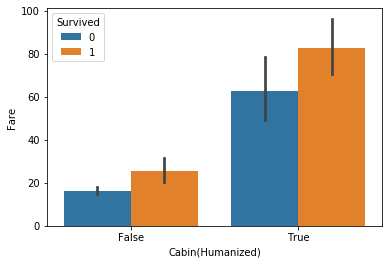

In [1253]:
sns.barplot(data=train, x="Cabin(Humanized)", y="Fare", hue="Survived")

In [1254]:
train_cabin = train[(train["Cabin(Humanized)"] == True)]
low_fare = train_cabin[train_cabin["Fare"]<100]

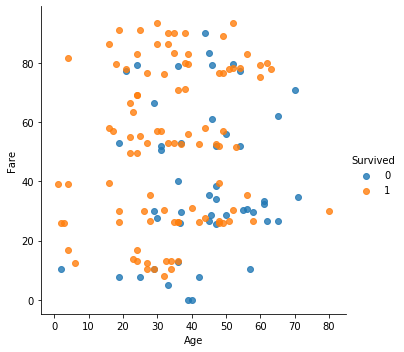

In [1255]:
sns.lmplot(data=low_fare,x="Age",y="Fare", hue="Survived",fit_reg=False)

In [1258]:
train["Fare(40)"] = train["Fare"]<=40
train["Fare(70)"] = (train["Fare"]>40)&(train["Fare"]<=70)
train["Fare(100)"] = train["Fare"]>=70

train[["Fare(40)","Fare(70)","Fare(100)"]]

,Fare(40),Fare(70),Fare(100)
PassengerId,,,
1,True,False,False
2,False,False,True
3,True,False,False
4,False,True,False
5,True,False,False
...,...,...,...
887,True,False,False
888,True,False,False
889,True,False,False


In [1259]:
test["Fare(40)"] = test["Fare"]<=40
test["Fare(70)"] = (test["Fare"]>40)&(test["Fare"]<=70)
test["Fare(100)"] = test["Fare"]>=70

test[["Fare(40)","Fare(70)","Fare(100)"]]

,Fare(40),Fare(70),Fare(100)
PassengerId,,,
892,True,False,False
893,True,False,False
894,True,False,False
895,True,False,False
896,True,False,False
...,...,...,...
1305,True,False,False
1306,False,False,True
1307,True,False,False


In [1260]:
pd.pivot_table(train,index=["Sex_encode","Cabin(Humanized)","Fare(40)","Fare(70)","Fare(100)","FamilySize(single)","FamilySize(medium)","FamilySize(big)","Age(Young)","Age(Medium)","Age(Old)"],values="Survived")

Survived
Sex_encode Cabin(Humanized) Fare(40) Fare(70) Fare(100) FamilySize(single) FamilySize(medium) FamilySize(big) Age(Young) Age(Medium) Age(Old)          
0          False            False    False    True      False              True               False           False      False       True      0.500000
                                                                                                                         True        False     0.000000
                                                        True               False              False           False      False       True      0.000000
                                                                                                                         True        False     0.000000
                                     True     False     False              False              True            False      True        False     0.000000
...                                                                                                                                                 ...
1          True             True     False    False     False              True               False           False      False       True      1.000000
                                                                                                                         True        False     0.833333
                                                                                                              True       False       False     0.666667
                                                        True               False              False           False      False       True      0.777778
                                                                                                                         True        False     1.000000

[64 rows x 1 columns]

In [1261]:
train_William = train[(train["Name"].str.contains("Master")) |(train["Name"].str.contains("Miss"))]
pd.pivot_table(train_William,index=["Embarked_S","Age(Old)"],values="Survived")

Survived
Embarked_S Age(Old)          
False      False     0.772727
           True      0.866667
True       False     0.588710
           True      0.764706

In [1262]:
train["Name_master"]=(train["Name"].str.contains("Master."))|(train["Name"].str.contains("Miss"))

In [1263]:
test["Name_master"]=(test["Name"].str.contains("Master."))|(test["Name"].str.contains("Miss"))

### Use Decision tree

In [1264]:
feature_names = ["Sex_encode","Fare(40)","Fare(70)","Fare(100)","FamilySize(big)","Age(Young)","Age(Medium)","Age(Old)","Name_master","Embarked_S","Pclass_3"]
feature_names

['Sex_encode',
 'Fare(40)',
 'Fare(70)',
 'Fare(100)',
 'FamilySize(big)',
 'Age(Young)',
 'Age(Medium)',
 'Age(Old)',
 'Name_master',
 'Embarked_S',
 'Pclass_3']

In [1265]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 11)


,Sex_encode,Fare(40),Fare(70),Fare(100),FamilySize(big),Age(Young),Age(Medium),Age(Old),Name_master,Embarked_S,Pclass_3
PassengerId,,,,,,,,,,,
1,0,True,False,False,False,False,True,False,False,True,True
2,1,False,False,True,False,False,False,True,False,False,False
3,1,True,False,False,False,False,True,False,True,True,True
4,1,False,True,False,False,False,False,True,False,True,False
5,0,True,False,False,False,False,False,True,False,True,True


In [1266]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 11)


,Sex_encode,Fare(40),Fare(70),Fare(100),FamilySize(big),Age(Young),Age(Medium),Age(Old),Name_master,Embarked_S,Pclass_3
PassengerId,,,,,,,,,,,
892,0,True,False,False,False,False,False,True,False,False,True
893,1,True,False,False,False,False,False,True,False,True,True
894,0,True,False,False,False,False,False,True,False,False,False
895,0,True,False,False,False,False,True,False,False,True,True
896,1,True,False,False,False,False,True,False,False,True,True


In [1267]:
label_name = "Survived"

In [1268]:
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### 의사결정나무 사용

In [1269]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth =15)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1270]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1271]:
prediction = model.predict(X_test)
print(prediction.shape)
prediction[0:5]

(418,)


array([0, 1, 0, 0, 1], dtype=int64)

### Submit

In [1272]:
submit = pd.read_csv("Downloads/titanic/gender_submission.csv", index_col = "PassengerId")

submit["Survived"] = prediction

submit

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [1273]:
submit.to_csv("Downloads/titanic/decision-tree.csv")